# Assignment 1

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Classification using KNN

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset contains 178 wine samples with 13 chemical features, used to classify wines into different classes based on their origin.

The **response variable** is `class`, which indicates the type of wine. We'll use all of the chemical features to predict this response variable.

In [56]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Bind the 'class' (wine target) to the DataFrame
wine_df['class'] = wine_data.target

# Display the DataFrame
wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#### **Question 1:** 
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Wine dataset**:

_(i)_ How many observations (rows) does the dataset contain?

In [58]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [59]:
# Your answer here 
# You can also check that at wine_df.info(): 178 entries
wine_df.shape[0]

178

_(ii)_ How many variables (columns) does the dataset contain?

In [60]:
# Your answer here
# You can also check that at wine_df.info(): Data columns (total 14 columns)
wine_df.shape[1]

14

_(iii)_ What is the 'variable type' of the response variable `class` (e.g., 'integer', 'category', etc.)? What are the 'levels' (unique values) of the variable?

In [61]:
# Your answer here
# You can also check that at wine_df.info(): 13 class 178 non-null int64
wine_df["class"].dtype

dtype('int64')


_(iv)_ How many predictor variables do we have (Hint: all variables other than `class`)? 

In [62]:
# Your answer here 
# 13, This dataset contains 178 wine samples with 13 chemical features, 
# used to classify wines into different classes based on their origin
wine_df.shape[1] - 1

13

You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Standardization and data-splitting

Next, we must preform 'pre-processing' or 'data munging', to prepare our data for classification/prediction. For KNN, there are three essential steps. A first essential step is to 'standardize' the predictor variables. We can achieve this using the scaler method, provided as follows:

In [63]:
# Select predictors (excluding the last column)
predictors = wine_df.iloc[:, :-1]

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

(i) Why is it important to standardize the predictor variables?

> Your answer here...
Standardizing predictor variables ensures they are on the same scale. This is important because differences in scale can disproportionately affect models that rely on distance metrics (like K-Nearest Neighbors).

(ii) Why did we elect not to standard our response variable `Class`?

> Your answer here...
Although the response variable is represented by numbers, these values are class labels, not magnitudes. We could have chosen to assign it letters instead. Standardizing them would completely distort their meaning.

(iii) A second essential step is to set a random seed. Do so below (Hint: use the random.seed function). Why is setting a seed important? Is the particular seed value important? Why or why not?

> Your answer here...
 np.random.seed(33)
# Setting a seed ensures that random numbers are the same each time the code runs, which is 
# important for reproducibility. The specific seed value doesn't matter — we set it simply to
# get consistent results for testing or comparisons.

(iv) A third essential step is to split our standardized data into separate training and testing sets. We will split into 75% training and 25% testing. The provided code randomly partitions our data, and creates linked training sets for the predictors and response variables. 

Extend the code to create a non-overlapping test set for the predictors and response variables.

In [64]:
# set a seed for reproducibility
np.random.seed(123)

# split the data into a training and testing set. hint: use train_test_split !

# Your code here ...
wine_complete = pd.concat([predictors_standardized, wine_df["class"]], axis=1)

wine_train, wine_test = train_test_split( wine_complete, train_size=0.75, stratify=wine_complete["class"])

# print(wine_train.head())
# print(wine_test.head())
# wine_train.info()

#### **Question 3:**
#### Model initialization and cross-validation
We are finally set to fit the KNN model. 


Perform a grid search to tune the `n_neighbors` hyperparameter using 10-fold cross-validation. Follow these steps:

1. Initialize the KNN classifier using `KNeighborsClassifier()`.
2. Define a parameter grid for `n_neighbors` ranging from 1 to 50.
3. Implement a grid search using `GridSearchCV` with 10-fold cross-validation to find the optimal number of neighbors.
4. After fitting the model on the training data, identify and return the best value for `n_neighbors` based on the grid search results.

In [70]:
# Your code here...
knn = KNeighborsClassifier(n_neighbors=5)
knn
# I included the 50 neighbors case
parameter_grid = {
    "n_neighbors": range(1, 51, 1),
}

wine_tune_grid = GridSearchCV(
    estimator=knn,
    param_grid=parameter_grid,
    cv=10
)
feature_columns = wine_train.columns[:-1]
X = wine_train[feature_columns]
y = wine_train["class"]

wine_tune_grid.fit(X, y)

accuracies_grid = pd.DataFrame(wine_tune_grid.cv_results_)
accuracies_grid



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003954,0.001768,0.014719,0.019354,1,{'n_neighbors': 1},1.000000,0.928571,1.0,0.692308,1.000000,1.0,1.000000,1.000000,1.000000,0.923077,0.954396,0.092139,39
1,0.002850,0.000884,0.003850,0.001550,2,{'n_neighbors': 2},1.000000,0.928571,1.0,0.692308,1.000000,1.0,1.000000,0.923077,0.923077,0.923077,0.939011,0.089628,50
2,0.002237,0.000483,0.004528,0.001746,3,{'n_neighbors': 3},1.000000,0.928571,1.0,0.846154,1.000000,1.0,1.000000,1.000000,0.923077,0.923077,0.962088,0.051217,28
3,0.003750,0.002529,0.004919,0.002913,4,{'n_neighbors': 4},0.928571,0.928571,1.0,0.846154,0.923077,1.0,1.000000,1.000000,0.923077,1.000000,0.954945,0.050406,35
4,0.004025,0.003569,0.003843,0.003166,5,{'n_neighbors': 5},1.000000,0.928571,1.0,0.923077,0.923077,1.0,1.000000,1.000000,0.923077,1.000000,0.969780,0.037042,7
5,0.002422,0.000808,0.003583,0.002934,6,{'n_neighbors': 6},0.928571,1.000000,1.0,0.923077,0.923077,1.0,1.000000,1.000000,0.923077,1.000000,0.969780,0.037042,7
6,0.008961,0.014369,0.004505,0.002570,7,{'n_neighbors': 7},1.000000,0.928571,1.0,0.923077,0.923077,1.0,1.000000,1.000000,1.000000,1.000000,0.977473,0.034441,1
7,0.007019,0.004860,0.005205,0.002657,8,{'n_neighbors': 8},0.928571,1.000000,1.0,0.846154,0.923077,1.0,1.000000,0.923077,0.923077,1.000000,0.954396,0.050719,39
8,0.004201,0.003279,0.004493,0.002482,9,{'n_neighbors': 9},1.000000,0.928571,1.0,0.923077,0.923077,1.0,1.000000,0.923077,1.000000,1.000000,0.969780,0.037042,9
9,0.006004,0.003539,0.005033,0.003066,10,{'n_neighbors': 10},1.000000,0.928571,1.0,0.846154,0.923077,1.0,0.923077,0.923077,1.000000,1.000000,0.954396,0.050719,39


In [71]:
wine_tune_grid.best_params_

{'n_neighbors': 7}

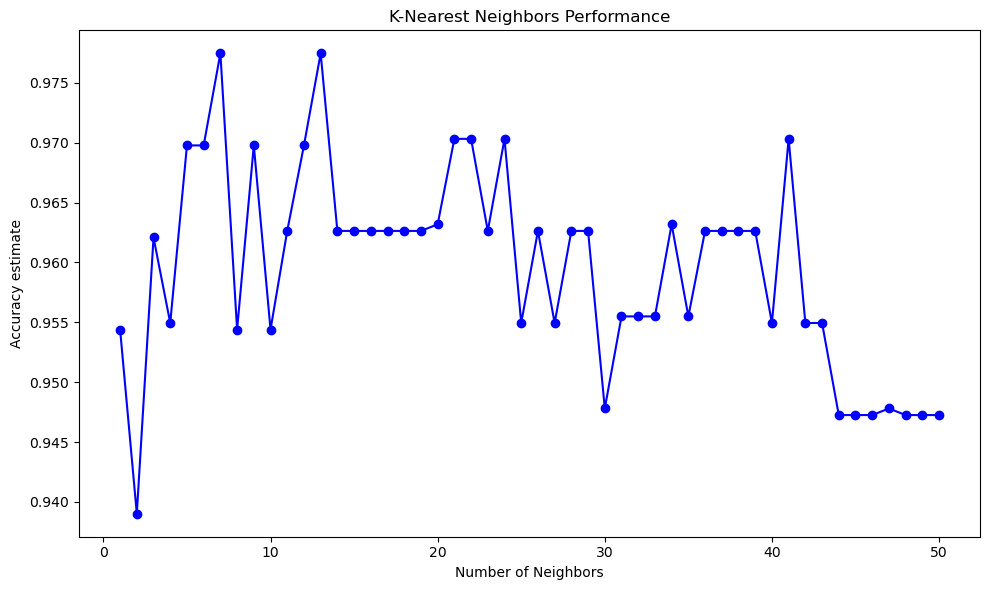

In [72]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(accuracies_grid['param_n_neighbors'], accuracies_grid['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy estimate')
plt.title('K-Nearest Neighbors Performance')
plt.tight_layout()
plt.show()

#### **Question 4:**
#### Model evaluation

Using the best value for `n_neighbors`, fit a KNN model on the training data and evaluate its performance on the test set using `accuracy_score`.

In [73]:
# Your code here...
knn = KNeighborsClassifier(n_neighbors=7)
knn
feature_columns = wine_train.columns[:-1]
X = wine_train[feature_columns]
y = wine_train["class"]
knn.fit(X=X, y=y)
wine_test["predicted"] = knn.predict(wine_test[feature_columns])
print(wine_test[["class", "predicted"]])

accuracy = accuracy_score(wine_test["class"], wine_test["predicted"])
print("Accuracy:", accuracy)

     class  predicted
102      1          1
84       1          1
96       1          2
65       1          0
79       1          1
17       0          0
109      1          1
113      1          1
28       0          0
159      2          2
38       0          0
34       0          0
125      1          1
115      1          1
71       1          1
76       1          1
131      2          2
33       0          0
60       1          1
19       0          0
114      1          1
47       0          0
48       0          0
158      2          2
133      2          2
137      2          2
154      2          2
136      2          2
2        0          0
168      2          2
117      1          1
32       0          0
22       0          0
108      1          1
73       1          0
77       1          1
142      2          2
9        0          0
85       1          1
58       0          0
45       0          0
175      2          2
42       0          0
143      2          2
177      2

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for number of variables, observations and data types. | Data inspection is missing or incomplete.         |
| **Data Scaling**                                       | Data scaling or normalization is applied where necessary (e.g., using `StandardScaler`). | Data scaling or normalization is missing or incorrectly applied. |
| **Model Initialization**                               | The KNN model is correctly initialized and a random seed is set for reproducibility.            | The KNN model is not initialized, is incorrect, or lacks a random seed for reproducibility. |
| **Parameter Grid for `n_neighbors`**                   | The parameter grid for `n_neighbors` is correctly defined. | The parameter grid is missing or incorrectly defined. |
| **Cross-Validation Setup**                             | Cross-validation is set up correctly with 10 folds. | Cross-validation is missing or incorrectly set up. |
| **Best Hyperparameter (`n_neighbors`) Selection**       | The best value for `n_neighbors` is identified using the grid search results. | The best `n_neighbors` is not selected or incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using accuracy. | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 05/18/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
